In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import string
import re
import nltk
import gensim
import spacy
import en_core_web_sm
import requests

# Preprocesado y modelado
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 

#nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger') #<--- https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ 
nltk.download('punkt')

from bs4 import BeautifulSoup

# evaluacion modelos
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
dfen = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master/dfenunico.csv')
dfen

ID                                              Title  \
0       37           Kenya National Social Protection Policy    
1       41        National Disaster risk Management Framework   
2       42       The National Disaster Management Plan (NDMP)   
3       43     National Disaster Risk Reduction Policy (2013)   
4       45   National Sustainable Development Strategy (NSDS)   
...    ...                                                ...   
1148  4110              Research and Innovation Policy (2021)   
1149  4111         Eighth National Develepment Plan 2022-2026   
1150  4112              National Livestock Development Policy   
1151  4113  National Strategy to Reduce Deforestration and...   
1152  4117  Intended Nationally Determined Contribution (I...   

                                            Description  \
0     The Kenya National Social Protection Policy (N...   
1     The National Disaster risk Management Framewor...   
2     The government adopted the National Disaster M...   
3     To tackle environmental issues, the government...   
4     The government formulated the National Sustain...   
...                                                 ...   
1148  The Research and Innovation (R&I) policy of Le...   
1149  The "Eighth National Development Plan (8NDP) -...   
1150  This Policy promotes sustainable livestock dev...   
1151  Zambia has developed the National REDD+ Strate...   
1152  The INDC of Mexico has two components, one for...   

                                                 addinf  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
...                                                 ...   
1148  The R&I policy specifically address Sustainabl...   
1149                                                      
1150  The livestock industry is increasingly becomin...   
1151                                                      
1152                                                      

                                                    CPP  \
0                                                         
1     The Framework set nine priority areas to estab...   
2     The plan aimed at enhancing the capacity of th...   
3     To tackle environmental issues, the government...   
4     The Strategy envisioned to evolve a just and h...   
...                                                 ...   
1148                                                      
1149                                                      
1150  In order to attain this vision, the Government...   
1151  To tackle the challenge of deforestation and f...   
1152  The INDC of Mexico has two components, one for...   

                           Policy category 1  Policy category code 1  \
0                Social protection (general)                    41.0   
1     Disaster risk reduction and management                    71.0   
2     Disaster risk reduction and management                    71.0   
3     Disaster risk reduction and management                    71.0   
4           Mid-term implementation strategy                    12.0   
...                                      ...                     ...   
1148                 Territorial development                    35.0   
1149        Mid-term implementation strategy                    12.0   
1150                               Livestock                    33.0   
1151                                Forestry                    52.0   
1152                          Climate change                    55.0   

      Policy category code 2  Policy category code 3 Lang  \
0                        0.0                     0.0   en   
1                        0.0                     0.0   en   
2                        0.0                     0.0

In [4]:
dfen['Policycat'] = dfen['Policy category code 1'].astype(int)
corpus=dfen['tokenclean']
labels=dfen['Policycat'].astype(str)

In [5]:
y=labels

In [6]:
#Calcular frequencias de cada label
dfen['Policy category 1'].value_counts()

Social protection (general)                    123
Climate change                                  98
Agriculture and rural development (general)     85
Mid-term implementation strategy                83
Natural resources (general)                     76
Forestry                                        74
Food security and nutrition (general)           69
Long-term development plan/vision               63
Nutrition                                       60
Disaster risk reduction and management          57
Biodiversity                                    47
Youth development                               41
Territorial development                         32
Fisheries and aquaculture                       29
Gender                                          28
Livestock                                       28
Water resources management                      26
Crop development and diversification            26
Poverty reduction                               23
Land                           

In [7]:
#calcular % de cada label
dfen['Policy category 1'].value_counts(1)

Social protection (general)                    0.106678
Climate change                                 0.084996
Agriculture and rural development (general)    0.073721
Mid-term implementation strategy               0.071986
Natural resources (general)                    0.065915
Forestry                                       0.064180
Food security and nutrition (general)          0.059844
Long-term development plan/vision              0.054640
Nutrition                                      0.052038
Disaster risk reduction and management         0.049436
Biodiversity                                   0.040763
Youth development                              0.035559
Territorial development                        0.027754
Fisheries and aquaculture                      0.025152
Gender                                         0.024284
Livestock                                      0.024284
Water resources management                     0.022550
Crop development and diversification           0

Text(0, 0.5, 'Number of docs')

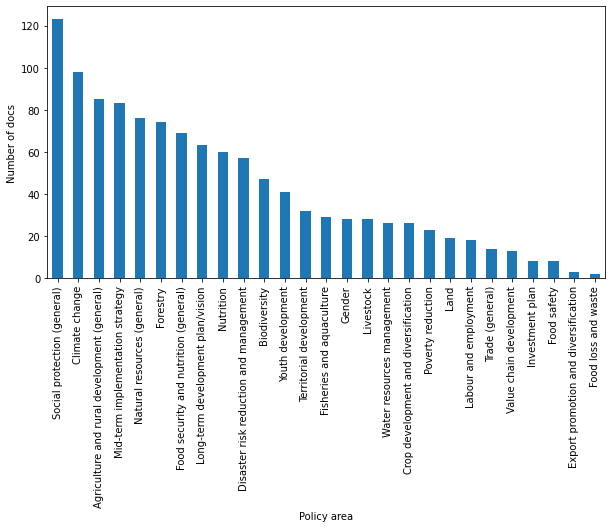

In [8]:
#Distribution of policy areas
ax = dfen['Policy category 1'].value_counts().plot(kind='bar', figsize=(10,5))
fig = ax.get_figure()
ax.set_xlabel('Policy area')
ax.set_ylabel('Number of docs')

In [9]:
df_grouped=dfen[['Policy category 1','tokenclean','corpus3']].groupby(by='Policy category 1').agg(lambda x:' '.join(x))
df_grouped.head(17)

tokenclean  \
Policy category 1                                                                                
Agriculture and rural development (general)  ['agricultural', 'overarch', 'average', 'growt...   
Biodiversity                                 ['first', 'safeguard', 'natural', 'still', 'al...   
Climate change                               ['climate', 'change', 'medium', 'long', 'term'...   
Crop development and diversification         ['seed', 'purpose', 'best', 'quality', 'see', ...   
Disaster risk reduction and management       ['disaster', 'risk', 'management', 'disaster',...   

                                                                                       corpus3  
Policy category 1                                                                               
Agriculture and rural development (general)  agricultural overarch average growth per besid...  
Biodiversity                                 first safeguard natural still allow efficient ...  
Climate change                               climate change medium long term list base them...  
Crop development and diversification         seed purpose best quality see crop convenientl...  
Disaster risk reduction and management       disaster risk management disaster risk managem...

In [10]:
corpus = dfen['corpus3'].apply(lambda x: [i for i in x.split()])
counts = corpus.explode().value_counts()
counts_top = counts.nlargest(50)
counts_top

food             1331
management       1195
health           1097
economic         1060
climate          1038
service          1011
forest            993
change            936
social            809
water             681
security          677
nutrition         675
agriculture       662
quality           652
agricultural      599
base              586
environment       568
growth            563
production        560
energy            556
land              555
system            533
access            519
rural             487
capacity          471
disaster          459
natural           455
term              443
poverty           432
environmental     427
risk              409
protection        408
human             395
community         393
reduction         384
private           378
local             374
population        374
address           361
market            356
education         347
forestry          347
value             345
economy           342
international     334
gender    

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['corpus3'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

abandon  abandonment  abide  \
Policy category 1                                                          
Agriculture and rural development (general)        0            0      0   
Biodiversity                                       0            0      0   
Climate change                                     0            0      0   

                                             ability  abiotic  abject  able  \
Policy category 1                                                             
Agriculture and rural development (general)        0        0       0     5   
Biodiversity                                       1        0       0     2   
Climate change                                     0        0       0     2   

                                             ably  abnormal  abreast  ...  \
Policy category 1                                                     ...   
Agriculture and rural development (general)     0         0        0  ...   
Biodiversity                                    0         0        0  ...   
Climate change                                  0         0        0  ...   

                                             yield  young  younger  youth  \
Policy category 1                                                           
Agriculture and rural development (general)      5      2        0      7   
Biodiversity                                     1      0        0      0   
Climate change                                   1      0        0      3   

                                             youthful  zero  zinc  zonation  \
Policy category 1                                                             
Agriculture and rural development (general)         0     2     0         0   
Biodiversity                                        0     0     0         0   
Climate change                                      0     4     0         0   

                                             zone  zoonotic  
Policy category 1                                            
Agriculture and rural development (general)     2         0  
Biodiversity                                    2         0  
Climate change                                  9         0  

[3 rows x 4646 columns]

In [12]:
#Metodo 1 - Bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(lowercase=False)
x = bow_converter.fit_transform(df_grouped['corpus3'])
words = bow_converter.get_feature_names_out()
len(words)

4646

In [13]:
#Para obtener methods
#object_methods = [method_name for method_name in dir(CountVectorizer)
                  #if callable(getattr(CountVectorizer, method_name))]
#object_methods

In [14]:
#Otra forma de obtener bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = df_grouped['corpus3']
X = vectorizer.fit_transform(data_corpus) 
print(X.toarray())
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 9 0]
 ...
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
['abandon', 'abandonment', 'abide', 'ability', 'abiotic', 'abject', 'able', 'ably', 'abnormal', 'abreast', 'abroad', 'absence', 'absenteeism', 'absolute', 'absorb', 'absorption', 'abstraction', 'abundance', 'abundant', 'abuse', 'academic', 'academically', 'academy', 'accelerate', 'acceleration', 'accept', 'acceptability', 'acceptable', 'acceptance', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accommodate', 'accommodation', 'accompany', 'accomplish', 'accomplishment', 'accord', 'accordance', 'accordingly', 'account', 'accountability', 'accountable', 'accountably', 'accredit', 'accreditation', 'accrue', 'accumulate', 'accumulation', 'accuracy', 'accurate', 'achievable', 'achievement', 'acid', 'acidification', 'acknowledge', 'acquire', 'acreage', 'acronym', 'across', 'act', 'actionable', 'activate', 'active', 'actively', 'activism', 'activity', 'ac

In [15]:
bigram_converter = CountVectorizer(ngram_range=[2,2], lowercase=False) 
x2 = bigram_converter.fit_transform(df_grouped['corpus3'])
bigrams = bigram_converter.get_feature_names()
len(bigrams)

62771

In [16]:
trigram_converter = CountVectorizer(ngram_range=[3,3], lowercase=False) 
x3 = trigram_converter.fit_transform(df_grouped['corpus3'])
trigrams = trigram_converter.get_feature_names()
len(trigrams)

87219

In [17]:
print(len(words), len(bigrams), len(trigrams))

4646 62771 87219


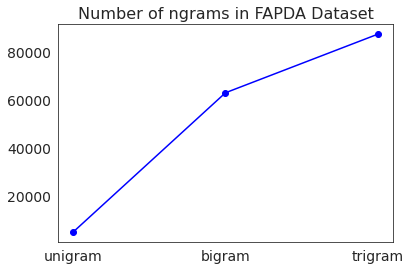

In [18]:
sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
#plt.margins(0.1)
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in FAPDA Dataset', {'fontsize':16})
plt.show()

In [19]:
training_data, test_data = model_selection.train_test_split(dfen, train_size = 0.7, random_state=0)

In [20]:
bow_transform = CountVectorizer(lowercase=False)
X_tr_bow = bow_transform.fit_transform(training_data['corpus3'])
len(bow_transform.vocabulary_)

4096

In [21]:
X_te_bow = bow_transform.transform(test_data['corpus3'])

In [22]:
y_tr = training_data['Policycat']
y_te = test_data['Policycat']

In [23]:
corpus

0       [social, protection, social, protection, broad...
1       [disaster, risk, management, disaster, risk, m...
2       [disaster, management, disaster, management, c...
3       [disaster, risk, reduction, environmental, rat...
4       [formulate, envision, evolve, harmonious, soci...
                              ...                        
1148    [research, innovation, research, innovation, r...
1149    [eighth, eighth, economic, transformation, dir...
1150    [livestock, livestock, expansion, extension, a...
1151    [forest, redd, deforestation, forestry, partic...
1152    [intend, nationally, determine, contribution, ...
Name: corpus3, Length: 1153, dtype: object

In [24]:
tfidf = TfidfTransformer()
X_tr_tfidf = tfidf.fit_transform(X_tr_bow)
X_te_tfidf = tfidf.fit_transform(X_te_bow)

In [25]:
def simple_logistic_classify1(X_tr, y_tr, X_test, y_test, description, _C=4, solver='newton-cg'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'newton-cg features', score)
    return model

def simple_logistic_classify2(X_tr, y_tr, X_test, y_test, description, _C=1.0, solver='lbfgs'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'lbfgs features', score)
    return model

def simple_logistic_classify3(X_tr, y_tr, X_test, y_test, description, _C=1.0, solver='liblinear'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'liblinear features', score)
    return model

In [26]:
model_bow = simple_logistic_classify1(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')


Test Score with bow newton-cg features 0.7225433526011561


In [27]:
model_bow = simple_logistic_classify2(X_tr_bow, y_tr, X_te_bow, y_te, 'liblinear')
model_bow = simple_logistic_classify3(X_tr_bow, y_tr, X_te_bow, y_te, 'lbfgs')

Test Score with liblinear lbfgs features 0.7167630057803468
Test Score with lbfgs liblinear features 0.7167630057803468


In [28]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
log_reg = LogisticRegression( n_jobs=-1, random_state=0)
C = np.logspace(-1, 4, 10)
penalty = ['l1', 'l2']
parameters = dict(    C=C, solver= solver_list,
                      penalty=penalty)
clf_GS = GridSearchCV(log_reg, parameters, scoring=['accuracy', 'roc_auc'], refit=False,  cv=5)
a=clf_GS.fit(X_tr_bow, y_tr)

In [29]:
params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver':['liblinear']}

gridlog = GridSearchCV(LogisticRegression(), params, cv=5, n_jobs=2, scoring='roc_auc')
gridlog.fit(X_tr_bow, y_tr)

#find best parameters
print('Logistic Regression parameters: ', gridlog.best_params_) # Now it displays all the parameters selected by the grid search

ValueError: ignored

In [ ]:
a.best_score_

In [ ]:
y_pred = clf_GS.predict(X_te_bow)
print(clf_GS.best_score_)
print(accuracy_score(y_te, y_pred))

In [ ]:
grid_predictions = a.best_estimator_.predict(X_te_bow)


In [ ]:
function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['C'])
print(); print(clf_GS.best_estimator_.get_params()['solver'])

In [ ]:
print('Logistic Regression parameters: ',clf_GS.best_params_)

In [ ]:
print(clf_GS.cv_results_)

In [ ]:
def simple_logistic_classify_opt(X_tr, y_tr, X_test, y_test, description, _C=1, solver='liblinear', penalty='l1'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, score)
    return model
model_bow = simple_logistic_classify_opt(X_tr_bow, y_tr, X_te_bow, y_te, 'liblinear')

In [ ]:
def simple_logistic_classify4(X_tr, y_tr, X_test, y_test, description, _C=1000, solver='liblinear'):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'newton-cg features', score)
    return model
model_tfidf = simple_logistic_classify4(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

In [ ]:
def multi_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=0.01):
    model = LogisticRegression(C=_C,multi_class='multinomial').fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [ ]:
# evaluate multinomial logistic regression model

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = LogisticRegression(solver='lbfgs')
n_scores = cross_val_score(model, X, labels, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# evaluate logistic regression model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model2 = LogisticRegression()
n_scores = cross_val_score(model2, X, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model_bow = multi_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

In [ ]:
model_tfidf = multi_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

In [ ]:
scores = ["precision", "recall"]

In [ ]:
mul_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_tr_bow, y_tr)

In [ ]:
param_grid_ = {'C': [1e-3, 1e-1, 1e0, 1e1, 1e2], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
bow_search = model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_, scoring='accuracy',error_score=0)
tfidf_search = model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [ ]:
bow_search.fit(X_tr_bow, y_tr)

In [ ]:
estimator.get_params().keys()

In [ ]:
GridSearchCV(cv=5, error_score=None,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_transform = corpus.TfidfTransformer(norm=None)
X_tfidf = tfidf_transform.fit_transform(X_bow)

In [ ]:
#Dividir en train y test
train, test = train_test_split(dfen, test_size=0.3, random_state = 5)
X_train=train['corpus3']
X_test=test['corpus3']
y_train=train['Policycat']
y_test=test['Policycat']

In [ ]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X)
vectors[0]

In [ ]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
mul_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)

In [ ]:
corpus=X
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    id2word.doc2bow(doc) for doc in corpus
]
vectors[1]

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
countvectorizer = CountVectorizer(analyzer= 'word')
tfidfvectorizer = TfidfVectorizer(analyzer='word')
count_wm = countvectorizer.fit_transform(X_train)
tfidf_wm = tfidfvectorizer.fit_transform(X_train)

In [ ]:
from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = freq.fit_transform(vectors)

onehot = Binarizer()
corpus = onehot.fit_transform(X_train.toarray())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(X)
dense = corpus.toarray()
dense

In [ ]:
from nltk.text import TextCollection

def vectorize(corpus):
    corpus = corpus
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc }